<center><b><font size=10>Introduction To Machine Learning Project</font></b></center>
<center><b><font color='red' size=5>Bike-Sharing Demand</font></b></center>

---
### An Introduction To The Project. "Background"
#### Predicting the number of bikes available for sharing in urban cities is important for many reasons.
#### Bike-sharing apps have become increasingly popular in recent years as a way to provide convenient and environmentally friendly transportation options in urban areas. However, managing a bike-sharing app can be challenging, as demand for bikes often varies throughout the day and week.
#### Predicting the number of bikes available for sharing allows cities and bike-sharing companies to better plan for and manage their bike fleet.
#### Cities, for example, can deploy additional bikes to a particular location if they predict high demand at a particular time. As a result, users will be able to find a bike more easily when they need one.

---
### About The Data:
#### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
#### It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.
#### Eventually, providing the city with a stable supply of rental bikes becomes a major concern.
#### The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
#### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

---
## Table Of Contents:
1. #### Importing Necessary Packages. [Go to T.1](#T.1)
2. #### Formulate The Machine Learning Problem. [Go to T.2](#T.2)
3. #### Exploratory Data Analysis. [Go to T.3](#T.3)
4. #### Preprocessing The Data. [Go to T.4](#T.4)
5. #### Build The Desired Models For The Problem. [Go to T.5](#T.5)
6. #### Models With And Without Processing The Data. [Go to T.6](#T.6)
7. #### Model Selection. [Go to T.7](#T.7)
8. #### K-Fold Cross Validation. [Go to T.8](#T.8)
9. #### Models' Evaluation. [Go to T.9](#T.9)
10. #### Conclusions. [Go to T.10](#T.10)

---
<a id="T.1"></a>
### Importing Necessary Packages:
#### We May Need Some Of The Following Packages, And Modules: 
* ##### Numpy
* ##### Pandas
* ##### Seaborn, MatplotLib
* ##### Sk-Learn "Science Kit Learn"
* ##### Keras

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### SK LEARN Model Selection Modules ####
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### SK LEARN Preprocessing ####
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

#### SK LEARN Models ####
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from keras import Sequential
from keras.layers import Dense, Input
from keras.models import Model
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf

#### SK LEARN Models' Evaluation ####
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score, davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

---
<a id="T.2"></a>
### Formulate The Machine Learning Problem:
#### In This Part, We Will Need To:
* ##### Read The Data.
* ##### Have A General Look At It "Show Some Samples From It".
* ##### Determine The Problem By Looking At The Target\Labels Column Values.
###### `PS:` For The Sake Of Simplicity, And Avoid Getting Into Time Series Forecasting, We'll Ignore The Dates. 

In [2]:
# Read The Data Using "read_csv" Function From Pandas, And Using The Parameter "encoding",
# Becuase We'll Face "Unicode Decode Error", As The Default Decoder Is "utf-8", So We Will Use "ISO-8859-1" Decoder
bike_data = pd.read_csv("SeoulBikeData.csv",encoding = "ISO-8859-1")
bike_data.drop("Date",axis=1, inplace=True)
bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### By Looking At The Values Of Target Column, Which Is `Rented Bike Count`, And The Features, We Can Determine That The Problem Is `Multiple Linear Regression`.

---
<a id="T.3"></a>
### Exploratory Data Analysis `'EDA'`:
#### In This Part, We Will Perform Some Exploration Like:
* ##### Have A Look At The Data's General Information, From Data Types, To Missing Values, Etc.
* ##### Have A Look At The Data's Ranges, To Determine If We Need Normalization\Standardization For The Data Or Not.
* ##### Have A Look At The Graphs That Would Let Us Know If There Is A Relationship Between Variables.

In [3]:
# Some General Information About Our Data, Their Purpose Are Explained In Each Print.
print("Data Size:",bike_data.shape)
print("-"* 30)
print("Data Columns:",list(bike_data.columns))
print("-"* 30)
print("Number of Examples 'N'=",bike_data.shape[0])
print("Number of Dimensions 'D'=",bike_data.shape[1]-1)
print("-"* 30)
print("Data Check For Any Duplicates:",bike_data.duplicated().any())
print("-"* 30)
print("About Dataset:")
bike_data.info()

Data Size: (8760, 13)
------------------------------
Data Columns: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']
------------------------------
Number of Examples 'N'= 8760
Number of Dimensions 'D'= 12
------------------------------
Data Check For Any Duplicates: False
------------------------------
About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float

In [4]:
Columns = list(bike_data.columns[1:-3])
for column in Columns:
    print("'" + column + "'", "Range Of Values:",bike_data[column].min(),"-",bike_data[column].max())
    print("-"* 30)
print("Values Shown Previously Prove That We Need To Re-Scale Our Features' Values.")

'Hour' Range Of Values: 0 - 23
------------------------------
'Temperature(°C)' Range Of Values: -17.8 - 39.4
------------------------------
'Humidity(%)' Range Of Values: 0 - 98
------------------------------
'Wind speed (m/s)' Range Of Values: 0.0 - 7.4
------------------------------
'Visibility (10m)' Range Of Values: 27 - 2000
------------------------------
'Dew point temperature(°C)' Range Of Values: -30.6 - 27.2
------------------------------
'Solar Radiation (MJ/m2)' Range Of Values: 0.0 - 3.52
------------------------------
'Rainfall(mm)' Range Of Values: 0.0 - 35.0
------------------------------
'Snowfall (cm)' Range Of Values: 0.0 - 8.8
------------------------------
Values Shown Previously Prove That We Need To Re-Scale Our Features' Values.


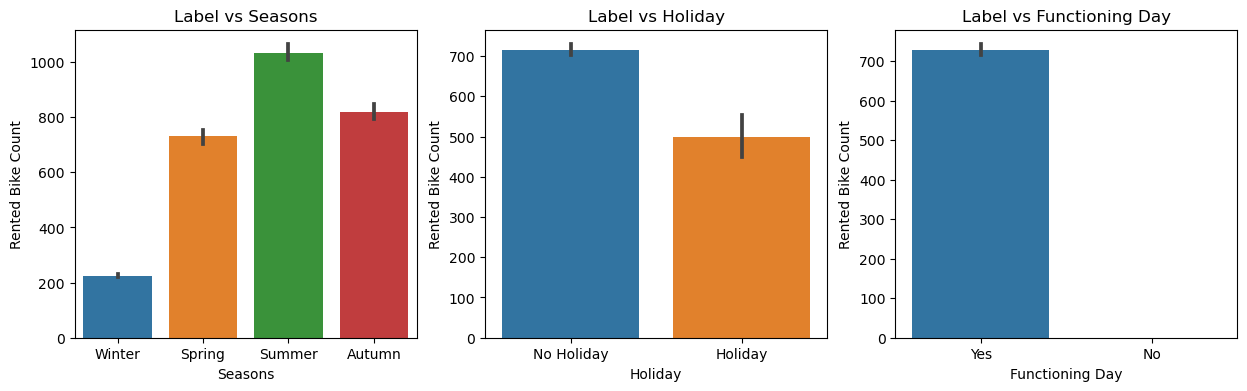

In [5]:
fig, ax= plt.subplots(1,3, figsize=(15,4))
sns.barplot(data=bike_data, y="Rented Bike Count", x="Seasons",ax=ax[0])
ax[0].set_title("Label vs Seasons")
sns.barplot(data=bike_data, y="Rented Bike Count", x="Holiday",ax=ax[1])
ax[1].set_title("Label vs Holiday")
sns.barplot(data=bike_data, y="Rented Bike Count", x="Functioning Day",ax=ax[2])
ax[2].set_title("Label vs Functioning Day")
plt.show()

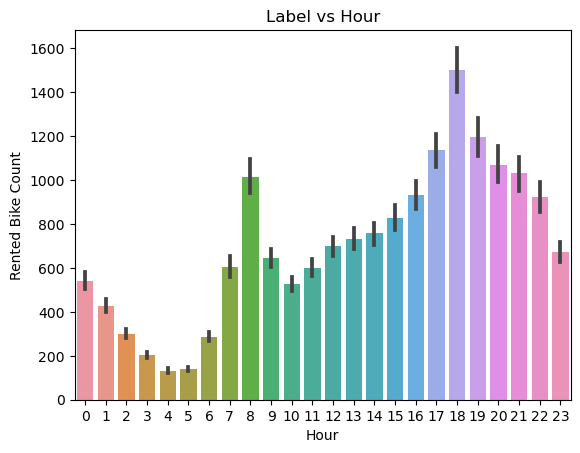

In [6]:
sns.barplot(data=bike_data, y="Rented Bike Count", x="Hour")
plt.title("Label vs Hour")
plt.show()

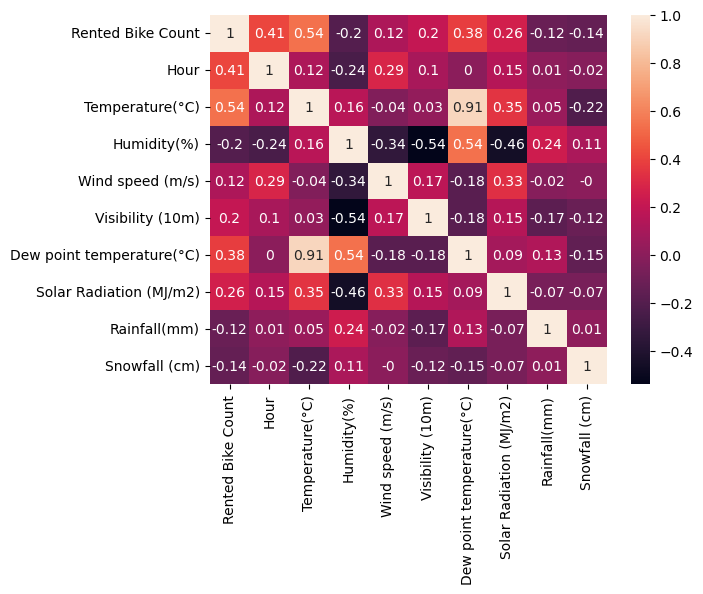

In [7]:
sns.heatmap(round(bike_data.corr(),2), annot=True)
plt.show()

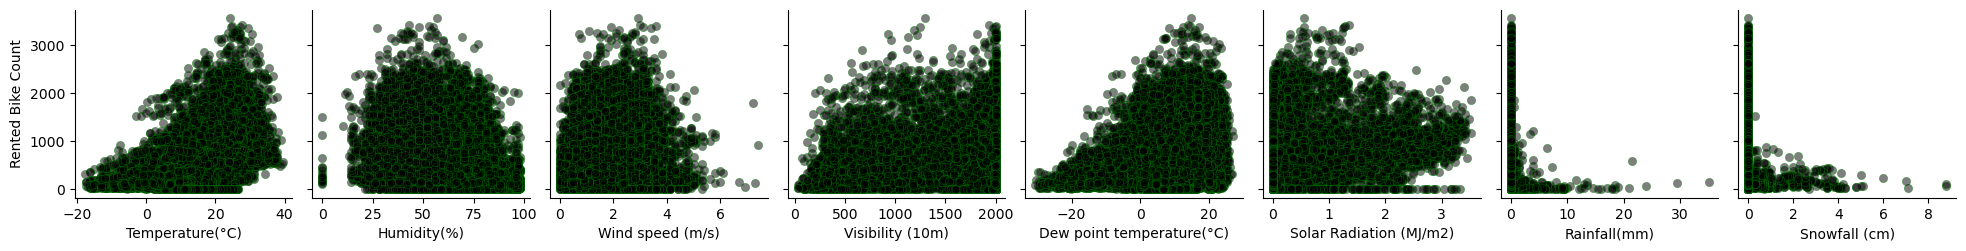

In [8]:
sns.pairplot(data=bike_data, y_vars="Rented Bike Count",x_vars=bike_data.columns[2:-3],plot_kws={'color':'black','edgecolor':'green','alpha':0.5})
plt.show()

---
<a id="T.4"></a>
### Preprocessing The Data.
#### In This Part, We Will Perform:
* ##### Data Normalization\Standardization.
* ##### Data Imputation For Missing Variables\Data.
* ##### Convert Cateogrical Variables Inro Numerical Data.
* ##### Dimentionalty Reduction Techniques.
* ##### Splitting The Data Into The Desired Percentages.
###### `PS:` We'll Use Standardization, As It Would Shift The Distribution Of A Our Variables, So That They Have A Mean Of 0 And A Standard Deviation Of 1, Becuase Linear Regression Models Assume That The input Variables Are Approximately Normally Distributed And Have Similar Scales, So Normalization May Make The Model More Sensitive To The Outliers In The Data And Can Lead To Unstable Estimates, While Standardization Helps To Enforce These Assumptions By Shifting The Distribution As We Said Previously, And This Allows The Model To Make Fairer Comparisons Between The Different Input Variables And Can Help To Improve The Performance Of The Model.

In [9]:
# Fill The Missing Values With The Mean Of The Corresponding Column, If Exists.
data_prep = bike_data.copy()
data_prep.fillna(data_prep.mean(), inplace = True)

# Standardizing The Data
scaler = StandardScaler()
#scaler = MinMaxScaler()
data_prep[data_prep.columns[:-3]] = pd.DataFrame(scaler.fit_transform(data_prep[data_prep.columns[:-3]]), columns =data_prep.columns[:-3])
data_prep.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,-0.698650,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
1,-0.776175,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
2,-0.824240,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
3,-0.926571,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
4,-0.971535,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes


In [10]:
# Convert Categorical Variables Into Numerical Variables
cat_numerical =pd.get_dummies(data_prep[["Holiday","Functioning Day"]], drop_first=True)
data_prep[["Holiday","Functioning Day"]] = cat_numerical
data_prep.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,-0.698650,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,1,1
1,-0.776175,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,1,1
2,-0.824240,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,Winter,1,1
3,-0.926571,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,Winter,1,1
4,-0.971535,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,Winter,1,1


In [11]:
#data_prep['Seasons'] = data_prep['Seasons'].replace({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})
seasons = data_prep['Seasons']
tfidf = TfidfVectorizer()
tfidf.fit(seasons)
seasons_vectors = tfidf.transform(seasons)
seasons_int = [tfidf.vocabulary_[tfidf.get_feature_names()[season.argmax()]] for season in seasons_vectors]
data_prep["Seasons"] = seasons_int
data_prep.head()
for integer, season in tfidf.vocabulary_.items():
    print(f'{integer}: {season}')

winter: 3
spring: 1
summer: 2
autumn: 0


In [12]:
# Picking Up The Features From The DataFrames
X_org = bike_data[bike_data.columns[1:-3]]
Y_org = bike_data['Rented Bike Count'].values

X_prep = data_prep[data_prep.columns[1:]]
Y_prep = data_prep['Rented Bike Count'].values

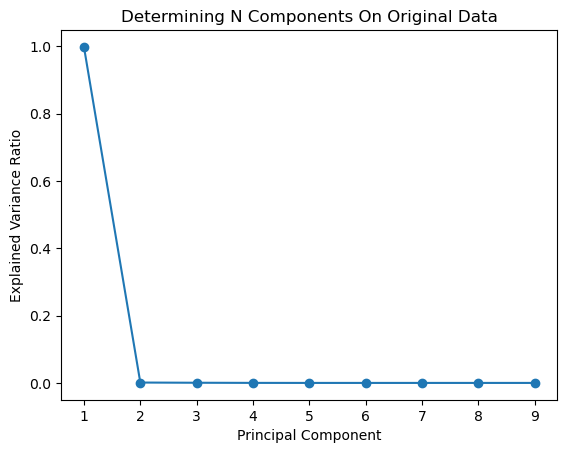

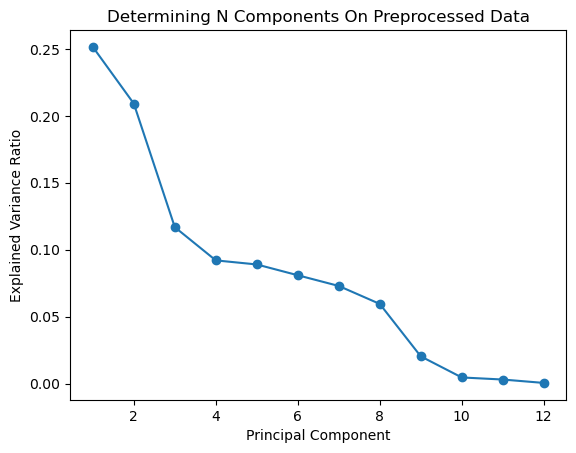

In [13]:
Features = data_prep.columns[1:]
pca = PCA()
X_org_reduced = pca.fit_transform(bike_data[Features[:-3]])
explained_var_org = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_var_org)+1), explained_var_org, marker='o')
plt.title('Determining N Components On Original Data')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

X_prep_reduced = pca.fit_transform(data_prep[Features])
explained_var_prep = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_var_prep)+1), explained_var_prep, marker='o')
plt.title('Determining N Components On Preprocessed Data')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

#### `PS:` We Would Determine The Number Of Components Based On Explained Variance Ratio Method, Because The Elbow Method Requires To Determine The Point Where The Variation Decreasing Starts Slowing Down, Which Can Be Difficult Visually.

In [14]:
components_num_prep = 0
var_explained_prep = 0
for i, var in enumerate(explained_var_prep):
    var_explained_prep += var
    if var_explained_prep >= 0.90:
        components_num_prep = i+1
        break
print("Number Of Components Needed To Explain 90% Of The Variance In The Preprocessed Data:",components_num_prep)

Number Of Components Needed To Explain 90% Of The Variance In The Preprocessed Data: 7


In [15]:
components_num_org = 0
var_explained_org = 0
for i, var in enumerate(explained_var_org):
    var_explained_org += var
    if var_explained_org >= 0.90:
        components_num_org = i+1
        break
print("Number Of Components Needed To Explain 90% Of The Variance In The Original Data:",components_num_org)

Number Of Components Needed To Explain 90% Of The Variance In The Original Data: 1


In [16]:
pca_org = PCA(n_components=components_num_org)
pca_prep = PCA(n_components=components_num_prep)

X_org_reduced = pca_org.fit_transform(bike_data[Features[:-3]])
X_prep_reduced = pca_prep.fit_transform(data_prep[Features])
print("Original Data Without Preprocessing Shape:", X_org_reduced.shape)
print("Preprocessed Data Reduced By PCA Shape:", X_prep_reduced.shape)

Original Data Without Preprocessing Shape: (8760, 1)
Preprocessed Data Reduced By PCA Shape: (8760, 7)


In [17]:
lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_org, Y_org)
booleanSlct_features = lasso_model.coef_ != 0
print("Array Of Boolean For The Selected Features With Respect To Their Position In The Original Data:\n",booleanSlct_features)
print("*"*15)
selected_features = list(X_org.columns[booleanSlct_features])
print("The Selected Features In The Original Data:\n",selected_features)
print("-"*30)
lasso_model.fit(X_prep, Y_prep)
booleanSlct_features = lasso_model.coef_ != 0
print("Array Of Boolean For The Selected Features With Respect To Their Position In The Preprocessed Data:\n",booleanSlct_features)
print("*"*15)
selected_features = X_prep.columns[booleanSlct_features]
print("The Selected Features In The Preprocessed Data:\n",selected_features)

Array Of Boolean For The Selected Features With Respect To Their Position In The Original Data:
 [ True  True  True  True  True  True  True  True  True]
***************
The Selected Features In The Original Data:
 ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
------------------------------
Array Of Boolean For The Selected Features With Respect To Their Position In The Preprocessed Data:
 [ True  True  True False False False False  True False  True False False]
***************
The Selected Features In The Preprocessed Data:
 Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Rainfall(mm)', 'Seasons'], dtype='object')


In [18]:
data_prep_cut = data_prep.copy()
data_prep_cut['binned_var'] = pd.qcut(data_prep['Rented Bike Count'], q=3, labels= False)
data_prep_cut.drop(['Rented Bike Count'], axis=1, inplace= True)
Y_prep_cut = data_prep_cut['binned_var'].values

In [19]:
X_org = X_org_reduced

X_prep = X_prep_reduced

X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org, Y_org, test_size=0.2, random_state=123)
X_train_org, X_val_org, y_train_org, y_val_org = train_test_split(X_train_org, y_train_org, test_size=0.1, random_state=123)

X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(X_prep, Y_prep, test_size=0.2, random_state=123)
X_train_prep, X_val_prep, y_train_prep, y_val_prep = train_test_split(X_train_prep, y_train_prep, test_size=0.1, random_state=123)

X_train_prep_cut, X_test_prep_cut, y_train_prep_cut, y_test_prep_cut = train_test_split(X_prep, Y_prep_cut, test_size=0.2, random_state=123)
X_train_prep_cut, X_val_prep_cut, y_train_prep_cut, y_val_prep_cut = train_test_split(X_train_prep_cut, y_train_prep_cut, test_size=0.1, random_state=123)

---
<a id="T.5"></a>
### Build The Desired Models For The Problem.
#### In This Part, We Will Build Different Models Like:
* ##### K-Means Clustering.
* ##### Linear Regression.
* ##### Neural Network For Linear Regression.
##### `PS:` For Linear Regression, We Will Use Different Models Such As:
* ###### The Simple Implementation Of Linear Regression Using `Linear Regression` Class From Sk-Learn `Ordinary Least Squares "OLS"` Method.
* ###### Stochastic Gradient Descent Regressor `SGDRegressor` Class From Sk-Learn, In Order To Train The Model `"Apply Gradient Descent"`.

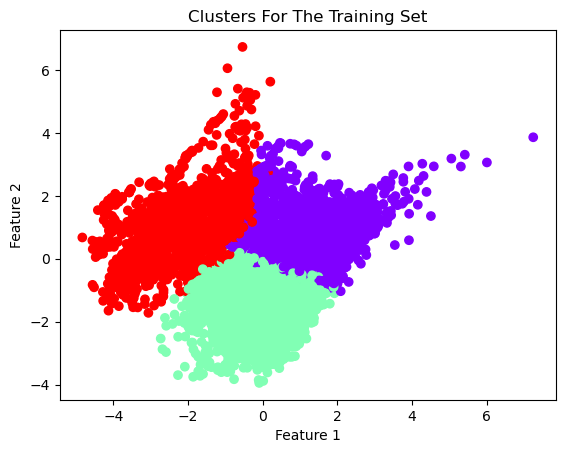

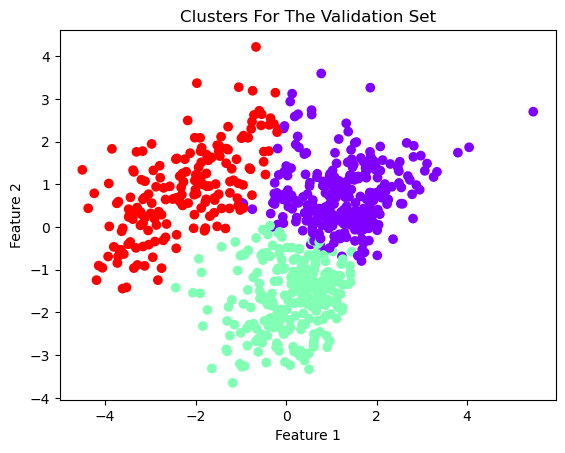

In [20]:
model_kmeans = KMeans(n_clusters=3, random_state=123)
model_kmeans.fit(X_train_prep)
train_cluster_labels = model_kmeans.predict(X_train_prep)
val_cluster_labels = model_kmeans.predict(X_val_prep)
# Plot the clusters for the training set
plt.scatter(X_train_prep[:, 0], X_train_prep[:, 1], c=train_cluster_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters For The Training Set")
plt.show()
# Plot the clusters for the validation set
plt.scatter(X_val_prep[:, 0], X_val_prep[:, 1], c=val_cluster_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters For The Validation Set")
plt.show()

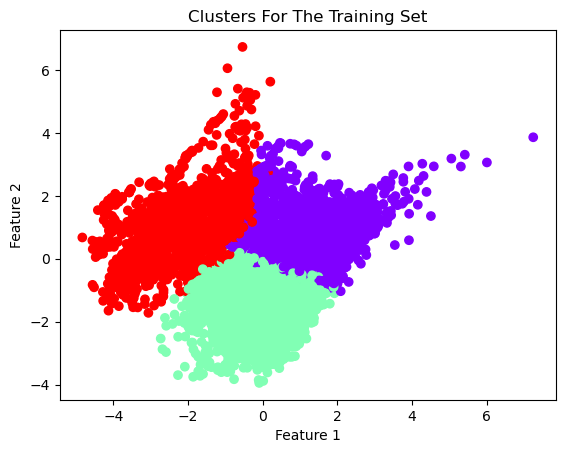

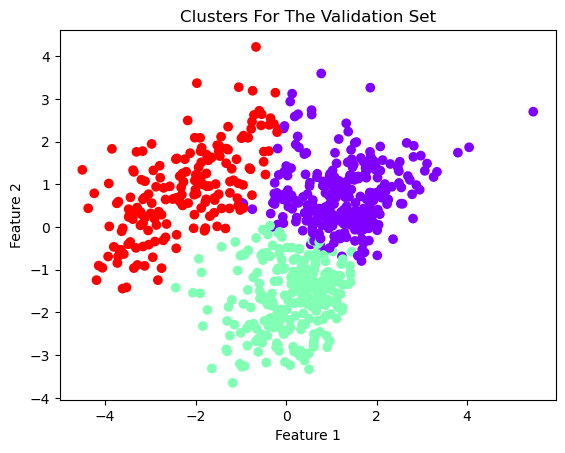

In [21]:
model_kmeans_cut = KMeans(n_clusters=3, random_state=123)
model_kmeans_cut.fit(X_train_prep_cut)
train_cluster_labels = model_kmeans_cut.predict(X_train_prep_cut)
val_cluster_labels = model_kmeans_cut.predict(X_val_prep_cut)
# Plot the clusters for the training set
plt.scatter(X_train_prep_cut[:, 0], X_train_prep_cut[:, 1], c=train_cluster_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters For The Training Set")
plt.show()
# Plot the clusters for the validation set
plt.scatter(X_val_prep_cut[:, 0], X_val_prep_cut[:, 1], c=val_cluster_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters For The Validation Set")
plt.show()

In [36]:
# Linear Regressor
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_prep, y_train_prep)
y_pred_lr = linear_regressor.predict(X_val_prep)
mse_lr = round(mean_squared_error(y_val_prep, y_pred_lr), 3)
print("MSE For Linear Regression Model:", mse_lr)


MSE For Linear Regression Model: 0.596


In [23]:
# Stochastic Gradiend Descent Regressor
iters_num = 1000
sgd_regressor = SGDRegressor(max_iter=iters_num, random_state=123, verbose=0)
sgd_regressor.fit(X_train_prep, y_train_prep)
y_pred_sgdr = sgd_regressor.predict(X_val_prep)
#mse_sgdr = round(mean_squared_error(y_val_prep, y_pred_sgdr), 3)
#print("MSE For Stochastic Gradeint Descent Regression Model:", mse_sgdr)

# Plot the fit line along with the data points
'''
w = sgd_regressor.coef_
b = sgd_regressor.intercept_
x_plot = np.linspace(X_train_prep[:,0].min(), X_train_prep[:,0].max(), num=len(X_train_prep))
y_plot = np.dot(np.column_stack((x_plot, np.ones(len(x_plot)))), w[:2])
plt.scatter(X_train_prep[:,0], y_train_prep)
plt.plot(x_plot, y_plot, color='r')
plt.show()
'''
print()

In [37]:
# Neural Network
tf.random.set_seed(123)
model = Sequential([
    Dense(units = X_train_prep.shape[1], activation = 'relu', name = 'Input_L'),
    Dense(units = X_train_prep.shape[1]**2, activation = 'relu', name = 'Hidden_L1'),
    Dense(units = X_train_prep.shape[1]**2, activation = 'relu', name = 'Hidden_L2'),
    Dense(units = X_train_prep.shape[1]**2, activation = 'relu', name = 'Hidden_L3'),
    Dense(units = 1, activation = 'linear', name = 'Output_L')
])
model.compile(optimizer= 'adam', loss= 'mse')
history = model.fit(X_train_prep, y_train_prep, validation_data=(X_val_prep, y_val_prep), epochs=100)
y_pred_nn = model.predict(X_val_prep)
#model.summary()
mse_nn = mean_squared_error(y_val_prep, y_pred_nn)
print("MSE For Neural Network:",mse_nn)
# To Get The Weights Of A Specific Layer:
'''
layer = model.get_layer(name='Hidden_L1')
weights = layer.get_weights()
'''

# Plot The Training vs Validation Error
'''
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''
print()

Epoch 1/100
198/198 [==============================] - 1s 3ms/step - loss: 0.5703 - val_loss: 0.5144
Epoch 2/100
198/198 [==============================] - 1s 3ms/step - loss: 0.4741 - val_loss: 0.4956
Epoch 3/100
198/198 [==============================] - 0s 2ms/step - loss: 0.4405 - val_loss: 0.4393
Epoch 4/100
198/198 [==============================] - 1s 3ms/step - loss: 0.4187 - val_loss: 0.4184
Epoch 5/100
198/198 [==============================] - 0s 2ms/step - loss: 0.3977 - val_loss: 0.4121
Epoch 6/100
198/198 [==============================] - 0s 2ms/step - loss: 0.3840 - val_loss: 0.3772
Epoch 7/100
198/198 [==============================] - 1s 3ms/step - loss: 0.3731 - val_loss: 0.3813
Epoch 8/100
198/198 [==============================] - 0s 2ms/step - loss: 0.3697 - val_loss: 0.3785
Epoch 9/100
198/198 [==============================] - 0s 2ms/step - loss: 0.3581 - val_loss: 0.3524
Epoch 10/100
198/198 [==============================] - 1s 3ms/step - loss: 0.3528 - val_lo

---
<a id="T.6"></a>
### Models With And Without Processing The Data.
#### In This Part, We Will Run The Previous Models With\out Preprocessing The Data.

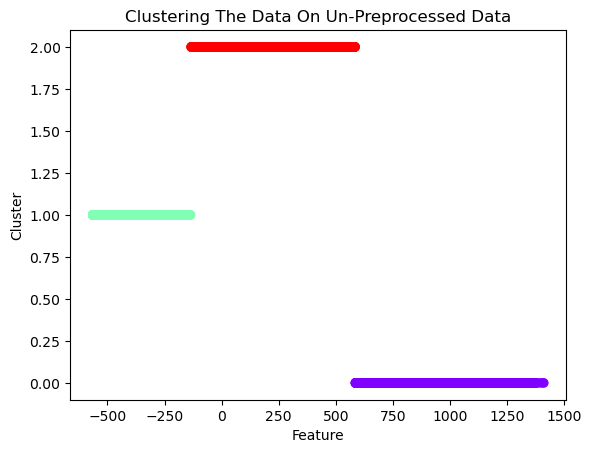

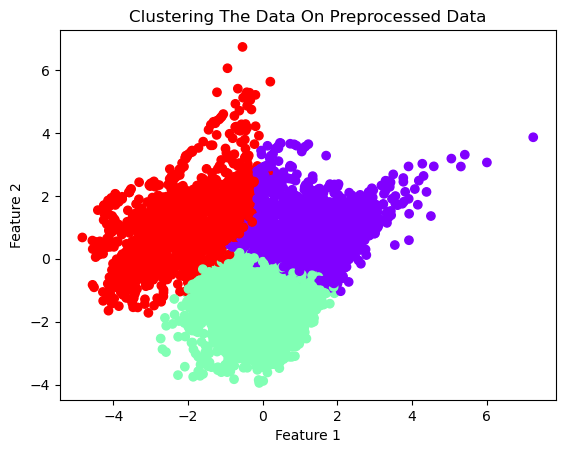

In [25]:
kmeans_org = KMeans(n_clusters=3, random_state=123)
kmeans_org.fit(X_train_org)
cluster_labels = kmeans_org.predict(X_train_org)
plt.scatter(X_train_org, cluster_labels, c=cluster_labels, cmap='rainbow')
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.title('Clustering The Data On Un-Preprocessed Data')
plt.show()

kmeans_prep = KMeans(n_clusters=3, random_state=123)
kmeans_prep.fit(X_train_prep)
train_cluster_labels = kmeans_prep.predict(X_train_prep)
plt.scatter(x=X_train_prep[:, 0], y=X_train_prep[:, 1], c=train_cluster_labels, cmap='rainbow')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clustering The Data On Preprocessed Data")
plt.show()

In [26]:
# Linear Regressor
lr_org = LinearRegression()
lr_org.fit(X_train_org, y_train_org)
y_org_pred_lr = lr_org.predict(X_val_org)
#mse_org = mean_squared_error(y_val_org, y_org_pred_lr)
#print("MSE For Linear Regression Model Without Data Preprocessing:", mse_org)

lr_prep = LinearRegression()
lr_prep.fit(X_train_prep, y_train_prep)
y_prep_pred_lr = lr_prep.predict(X_val_prep)
#mse_prep = mean_squared_error(y_val_prep, y_prep_pred_lr)
#print("MSE For Linear Regression Model With Data Preprocessing:", mse_prep)

In [27]:
# Stochastic Gradiend Descent Regressor
sgdr_org = SGDRegressor(max_iter=1000, random_state=123, verbose=0)
sgdr_org.fit(X_train_org, y_train_org)
y_org_pred_sgdr = sgdr_org.predict(X_val_org)
#mse_org = mean_squared_error(y_val_org, y_org_pred_sgdr)
#print("MSE For Stochastic Gradeint Descent Regression Model Without Data Preprocessing:", mse_org)

sgdr_prep = SGDRegressor(max_iter=1000, random_state=123, verbose=0)
sgdr_prep.fit(X_train_prep, y_train_prep)
y_prep_pred_sgdr = sgdr_prep.predict(X_val_prep)

#mse_prep = mean_squared_error(y_val_prep, y_prep_pred_sgdr)
#print("MSE For Stochastic Gradeint Descent Regression Model With Data Preprocessing:", mse_prep)

In [28]:
tf.random.set_seed(123)
model_org = Sequential([
    Dense(units = X_train_org.shape[1], activation = 'relu', name = 'Input_L'),
    Dense(units = X_train_org.shape[1]**2, activation = 'relu', name = 'Hidden_L1'),
    Dense(units = 1, activation = 'linear', name = 'Output_L')
])
print('Neural Network On Un-Preprocessed Data:')
model_org.compile(optimizer= 'adam', loss= 'mse')
history_org = model_org.fit(X_train_org, y_train_org, validation_data=(X_val_org, y_val_org), epochs=100)
#model_org.summary()
#y_org_pred_nn = model_org.predict(X_val_org)
#mse_org_nn = mean_squared_error(y_val_org, y_org_pred_nn)
#print("MSE For Neural Network:",mse_org_nn)

# Plot The Training vs Validation Error
'''
plt.plot(history_org.history['loss'], label='Training Loss')
plt.plot(history_org.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

print("-"*50)
print('Neural Network On Preprocessed Data:')
model_prep = Sequential([
    Dense(units = X_train_prep.shape[1], activation = 'relu', name = 'Input_L'),
    Dense(units = X_train_prep.shape[1]**2, activation = 'relu', name = 'Hidden_L1'),
    Dense(units = 1, activation = 'linear', name = 'Output_L')
])
model_prep.compile(optimizer= 'adam', loss= 'mse')
history_prep = model_prep.fit(X_train_prep, y_train_prep, validation_data=(X_val_prep, y_val_prep), epochs=100)
#model_prep.summary()
#y_prep_pred_nn = model_prep.predict(X_val_prep)
#mse_prep_nn = mean_squared_error(y_val_prep, y_prep_pred_nn)
#print("MSE For Neural Network:",mse_prep_nn)

# Plot The Training vs Validation Error
'''
plt.plot(history_prep.history['loss'], label='Training Loss')
plt.plot(history_prep.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''
print()

Neural Network On Un-Preprocessed Data:
Epoch 1/100
198/198 [==============================] - 1s 2ms/step - loss: 870145.5000 - val_loss: 802689.6250
Epoch 2/100
198/198 [==============================] - 0s 983us/step - loss: 693738.8125 - val_loss: 642578.1875
Epoch 3/100
198/198 [==============================] - 0s 972us/step - loss: 593558.5625 - val_loss: 602304.0625
Epoch 4/100
198/198 [==============================] - 0s 956us/step - loss: 581540.6875 - val_loss: 600648.5625
Epoch 5/100
198/198 [==============================] - 0s 981us/step - loss: 581312.6250 - val_loss: 601100.1250
Epoch 6/100
198/198 [==============================] - 0s 977us/step - loss: 581337.1875 - val_loss: 600499.8750
Epoch 7/100
198/198 [==============================] - 0s 968us/step - loss: 581174.5000 - val_loss: 600270.0000
Epoch 8/100
198/198 [==============================] - 0s 971us/step - loss: 581004.6875 - val_loss: 600336.7500
Epoch 9/100
198/198 [==============================] - 0s 

---
<a id="T.7"></a>
### Models Selection.
#### In This Part, We Will Perform Model Selection Process `"Hyper-Parameter Tunning"` For The Builded Models In [This](#T.5) Step.
#### For:
* ##### Clustering Model `"K-Means"`, We Will Use Elbow Method (Determine The K , Where The Change In The `Within-Cluster Sum Of Squares (WCSS) \ Intracluster Distances` Begins To Level Off And Form An "Elbow" In The Plot).
* ##### Linear Regression Model, We Will Try Different Parameters For The Model Through `Grid Search` To Get The Best Score Of The Model, And Those Parameters.
* ##### Neural Network, We Will Use The Same Approach As Linear Regression In Order To Find The Best Appropriate Parameters For The Model.

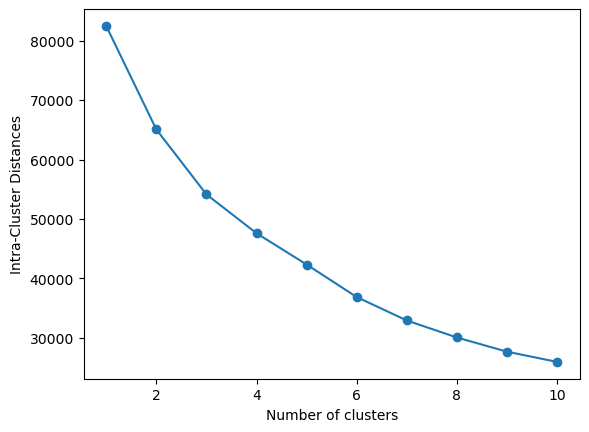

In [29]:
intra_dist = []
for i in range(1,11):
    model = KMeans(n_clusters = i, random_state = 123)
    model.fit(X_prep)
    intra_dist.append(model.inertia_)
plt.plot(range(1,11), intra_dist,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Intra-Cluster Distances')
plt.show()

In [30]:
grid = {'normalize': [True, False], 'fit_intercept': [True, False], 'copy_X': [True, False]}
lr = LinearRegression()
grid_search = GridSearchCV(lr, grid, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_prep, y_train_prep)
print("Best set of hyperparameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)

Best set of hyperparameters:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best score:  -0.5476419113658625


In [31]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1],
              'l1_ratio': [0, 0.15, 0.5, 0.75, 1],
              'fit_intercept': [True, False],
              'penalty':['elasticnet','l2', 'l1'],
              'max_iter': [100,250,500,750,1000]}
sgdr = SGDRegressor(random_state=123, verbose=0) #, learning_rate='optimal'
grid_search = GridSearchCV(sgdr, param_grid, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_prep, y_train_prep)
print("Best set of hyperparameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)

Best set of hyperparameters:  {'alpha': 0.01, 'fit_intercept': False, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'elasticnet'}
Best score:  -0.5492056796826115


In [ ]:
def create_model(lr=0.01):
    model = Sequential([
        Dense(units = X_train_prep.shape[1], activation = 'relu', name = 'Input_L'),
        Dense(units = X_train_prep.shape[1]**2, activation = 'relu', name = 'Hidden_L1'),
        Dense(units = 1, activation = 'linear', name = 'Output_L')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')
    return model
model = KerasRegressor(build_fn=create_model, verbose=0)
param_grid = {'batch_size': [32, 64, 128, 256, 512],
              'epochs': [10, 20, 30, 40, 50, 100, 500, 1000],
              'lr':[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train_prep, y_train_prep, validation_data=(X_val_prep, y_val_prep))
print("Best set of hyperparameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)
'''
Best set of hyperparameters:  {'batch_size': 512, 'epochs': 1000, 'lr': 0.03}
Best score:  -0.2651782477524686
'''
print()

---
<a id="T.8"></a>
<a id="T.9"></a>
### K-Fold Cross Validation & Models' Evaluation.
#### In This Part, We Will Perform `"K-Fold Cross Validation"` Process To Evaluate The Performance Of The Builded Models In [This](#T.5) Step By Training It On Different Subsets Of The Data And Testing It On The Remaining Data As The Graph Below Shows.
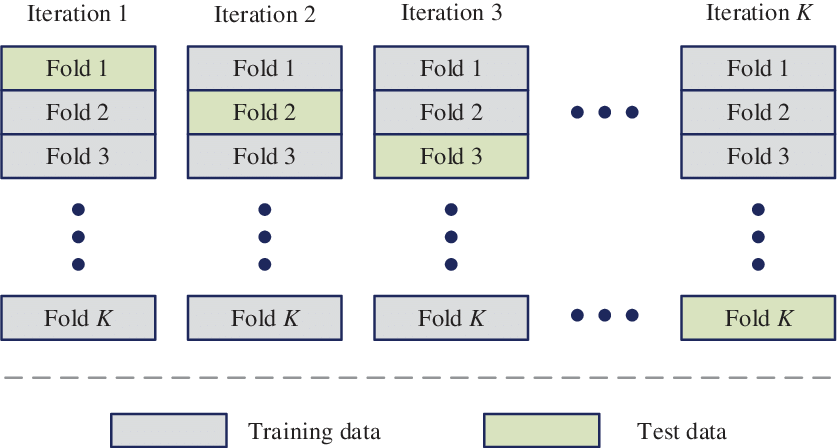
#### Then We Will Perform Model Evaluation On The Builded Models In [This](#T.5) Step, By Evaluate The Appropriate Metric To That Model.

In [32]:
kmeans = KMeans(n_clusters=3, random_state=123)
kf = KFold(n_splits=5, shuffle=True, random_state=123)
dvb_scores = []
# Start Iterating Through The Folds
for train_index, test_index in kf.split(X_train_prep):
    X_train, X_test = X_train_prep[train_index], X_train_prep[test_index]
    kmeans.fit(X_train_prep)
    y_pred = kmeans.predict(X_test)
    
    dvb_score = davies_bouldin_score(X_test, y_pred)
    dvb_scores.append(dvb_score)
print("Davies-Bouldin Scores: ", dvb_scores)

Davies-Bouldin Scores:  [1.5005475954133394, 1.5323006554592256, 1.501714525484245, 1.5155774461973834, 1.535144141104867]


In [33]:
model_LR = LinearRegression(fit_intercept= False, normalize= True, copy_X= True)
print(cross_val_score(model_LR, X_train_prep, y_train_prep, cv=5, scoring ="neg_mean_squared_error"))

[-0.55205839 -0.54081776 -0.5421389  -0.55310228 -0.55009222]


In [34]:
sgdr_cv = SGDRegressor(max_iter=100, random_state=123, verbose=0, alpha= 0.01, fit_intercept= False, l1_ratio= 0, penalty= 'elasticnet')
print(cross_val_score(sgdr_cv, X_train_prep, y_train_prep, cv=5, scoring ="neg_mean_squared_error"))

[-0.55276861 -0.54448689 -0.54281972 -0.55396066 -0.55199252]


In [35]:
def create_model():
    model_NN = Sequential([
            Dense(units = X_train_prep.shape[1], activation = 'relu', name = 'Input_L'),
            Dense(units = X_train_prep.shape[1]**2, activation = 'relu', name = 'Hidden_L1'),
            Dense(units = 1, activation = 'linear', name = 'Output_L')
        ])
    model_NN.compile(optimizer='adam', loss='mse')
    return model_NN
model_NN = KerasRegressor(build_fn=create_model)
print(cross_val_score(model_NN, X_train_prep, y_train_prep, cv=5, scoring ="neg_mean_squared_error"))

158/158 [==============================] - 0s 880us/step - loss: 0.6546
[-0.51359895 -0.48104314 -0.50559268 -0.73139792 -0.53056193]


---
### Addition To Model Selection Part.

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
mse_losses = []
model_NN1 = Sequential([
        Dense(units = X_train_prep.shape[1], activation = 'relu', name = 'Input_L'),
        Dense(units = X_train_prep.shape[1]**2, activation = 'relu', name = 'Hidden_L1'),
        Dense(units = 1, activation = 'linear', name = 'Output_L')
    ])
for lr in learning_rates:
    # train neural network with current learning rate
    model_NN1.compile(optimizer=tf.keras.optimizers.Adam(lr=lr), loss='mse')
    history = model_NN1.fit(X_train_prep, y_train_prep, validation_data=(X_val_prep, y_val_prep), epochs=10)
    mse_losses.append(history.history['val_loss'])
plt.plot(learning_rates, mse_losses)
plt.xlabel('Learning Rate')
plt.ylabel('MSE Loss')
plt.show()

min_index = mse_losses.index(min(mse_losses))
optimal_lr_size = learning_rates[min_index]
print("Optimal LR size:", optimal_lr_size)

In [ ]:
batch_sizes = [32, 64, 128, 256, 512]
mse_losses = []
model_NN2 = Sequential([
        Dense(units = X_train_prep.shape[1], activation = 'relu', name = 'Input_L'),
        Dense(units = X_train_prep.shape[1]**2, activation = 'relu', name = 'Hidden_L1'),
        Dense(units = 1, activation = 'linear', name = 'Output_L')
    ])
model_NN2.compile(optimizer='adam', loss='mse')
for batch_size in batch_sizes:
    history = model_NN2.fit(X_train_prep, y_train_prep, validation_data=(X_val_prep, y_val_prep), batch_size=batch_size, epochs=10)
    mse_losses.append(history.history['val_loss'])

# plot the MSE loss as a function of the batch size
plt.plot(batch_sizes, mse_losses)
plt.xlabel('Batch Size')
plt.ylabel('Validation Loss')
plt.show()
min_index = mse_losses.index(min(mse_losses))
optimal_batch_size = batch_sizes[min_index]
print("Optimal batch size:", optimal_batch_size)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(sgdr, X_train_prep, y_train_prep, cv=5, scoring='neg_mean_squared_error')

# plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("MSE")
#plt.ylim(-1000,1000)
plt.plot(train_sizes, np.mean(np.abs(train_scores), axis=1), 'o-', color="r", label="Training Error")
plt.plot(train_sizes, np.mean(np.abs(test_scores), axis=1), 'o-', color="g", label="Cross-Validation Error")
plt.legend(loc="best")
plt.show()

---
<a id="T.10"></a>
### Conclusions:
1. #### In holiday or non-functioning 'working' days there is more demand on rented bikes than other days "functioning days \ no holiday".
2. #### For seasons, in Summer there is more demand on rented bikes than other seasons, and the order of seasons according to the demand is: `[summer, autumn, spring, winter]`.
3. #### During the day, at 8AM is the most demanding hours on rented bikes during the morning, at 6PM is the most demanding hour on rented bikes during the rest of the day, and it's the most hour that have demands on rented bikes during the whole day, also people prefer to rent bikes in the evening than the morning hours.
#### We can also conclude other stuff from the graphs at [This](#T.3) step and other steps visually.